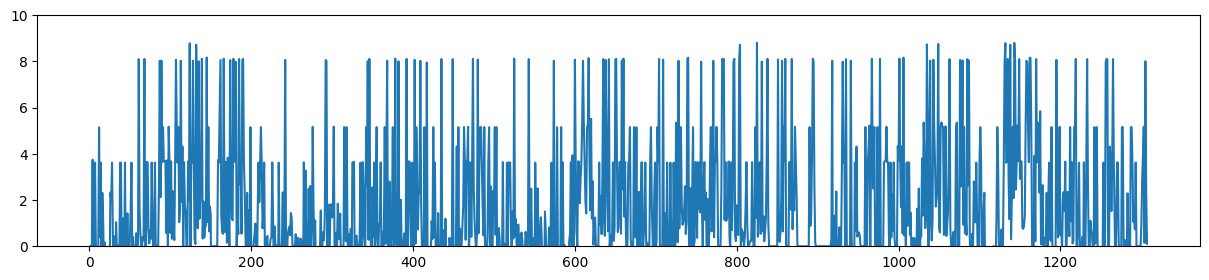

In [58]:
import matplotlib.pyplot as plt
import numpy as np
site = np.loadtxt("/mnt/g/My Drive/tool/LEISR_rate_translated_log.txt", usecols=0, skiprows=1, dtype='int') 
rate = np.loadtxt("/mnt/g/My Drive/tool/LEISR_rate_translated_log.txt", usecols=1, skiprows=1, dtype='float') 
# print(site)
# print(rate)
plt.ylim((0, 10))
plt.plot(site, rate)  
# plt.show()  
figure = plt.gcf() # get current figure
figure.set_size_inches(15, 3)

plt.savefig('/mnt/g/My Drive/tool/foo.png')


In [4]:
from Bio import SeqIO
seq = []
fasta_file = SeqIO.parse("/mnt/g/My Drive/tool/period_sequences_aligned_translated.fas", 'fasta')
for records in fasta_file:
    seq.append(str(records.seq))
counter = 0
for i in range(len(seq[0])):
    pos = 1
    for j in range(len(seq)):
        if seq[j][i] == "-" and pos == 1:
           pos = 0
    if pos == 1:
        print("position:",i)
        counter += 1
        
print(counter)

position: 5
position: 6
position: 249
position: 250
position: 251
position: 252
position: 253
position: 254
position: 255
position: 256
position: 257
position: 258
position: 259
position: 260
position: 261
position: 262
position: 584
position: 585
position: 586
position: 587
position: 588
position: 589
position: 590
position: 591
position: 592
position: 593
position: 594
position: 595
position: 596
position: 597
position: 598
position: 599
position: 600
position: 601
position: 602
position: 603
position: 604
position: 605
position: 606
position: 607
position: 608
position: 609
position: 610
position: 611
position: 612
position: 613
position: 614
position: 615
position: 616
position: 617
position: 618
position: 619
position: 620
position: 621
position: 622
position: 623
position: 624
position: 625
position: 626
position: 627
position: 628
position: 629
position: 630
position: 631
position: 632
position: 633
position: 634
position: 635
position: 636
position: 637
position: 638
position: 

In [15]:
import json 

with open("/mnt/g/My Drive/tool/period_sequences_aligned.fas.LEISR.json", 'r') as f:
  data = json.load(f)

# print(data["MLE"])
output = "Site\tRate"
dataset = (data["MLE"]["content"]["0"])
for  i in range(len(dataset)):
    output += f"\n{i+1}\t{dataset[i][0]}"
    # print(dataset[i])

with open("/mnt/g/My Drive/tool/LEISR_rate.txt", 'w') as out_file:
  out_file.write(output)

# print(output)

In [57]:
import math

with open("/mnt/g/My Drive/tool/LEISR_rate.txt", 'r') as rate_file:
  rate_list = rate_file.readlines()

counter = 1
site_number = 1
output = "Site\tRate"
while counter < len(rate_list):
    try:
        new_rate = math.log((float(rate_list[counter].strip().split("\t")[1]) + float(rate_list[counter+1].strip().split("\t")[1]) + float(rate_list[counter+2].strip().split("\t")[1]))/3)
    except:
        new_rate = 0
    counter += 3
    output += f"\n{site_number}\t{new_rate}"
    # print(f"{site_number}\t{new_rate}")
    site_number += 1

with open("/mnt/g/My Drive/tool/LEISR_rate_translated_log.txt", 'w') as out_file:
  out_file.write(output)

In [28]:
from Bio import SeqIO
gene_name = "Cry2"
import subprocess

fasta_sequences = SeqIO.parse(f"/mnt/g/My Drive/tool/period_sequences_aligned.fas", 'fasta')
output = ''
for records in fasta_sequences:
    # print(records.id)
    # print(records.seq.translate().replace("-", "X"))
    output += f'>{records.id}\n{records.seq.translate().replace("-", "X")}\n'
# print(output)

with open("/mnt/g/My Drive/tool/for_domain_search.fa", 'w') as out_file:
    out_file.write(output)

# fasta_sequences = SeqIO.parse(f"/mnt/g/My Drive/tool/period_sequences.fas", 'fasta')
# output = ''
# for records in fasta_sequences:
#     # print(records.id)
#     # print(records.seq.translate().replace("-", "X"))
#     output += f'>{records.id}\n{records.seq.translate().replace("-", "X")}\n'
# # print(output)
# with open("/mnt/g/My Drive/tool/for_domain_search_unaligned.fa", 'w') as out_file:
#     out_file.write(output)

subprocess.run('cd "/mnt/g/My Drive/tool/"\n~/pfam_scan/pfam_scan.py -evalue 0.01 -out ./domains.csv ./for_domain_search.fa ~/pfam/', shell = True)


# output = ''
# with open("/mnt/g/My Drive/tool/domains_unaligned.csv", 'r') as domain_position_file:
#     domain_position_list = domain_position_file.readlines()
# output = ''
# for i in range(1, len(domain_position_list)):
#     domain_position_split = (domain_position_list[i]).split(",")
#     print(domain_position_list[i])
    
#     transcript_id = domain_position_split[0]
    
#     alignment_file = SeqIO.parse("/mnt/g/My Drive/tool/for_domain_search.fa", 'fasta')
#     seq_name, sequence = '',''
#     for records in alignment_file:
#         print
#         if transcript_id in records.id:
    
#             seq_name, sequence = records.id, records.seq
#             break
#     residue_number = 0
#     seq_counter = 0
#     domain_start = int(domain_position_split[1])
#     domain_stop = int(domain_position_split[2])
#     # print(domain_start, domain_stop) 
#     while True and residue_number < len(sequence):
#         # print(seq_counter, residue_number)
#         current_residue = sequence[residue_number]
#         if current_residue != "X": 
#             seq_counter += 1
#             if domain_start == seq_counter:
#                 domain_position_list[i] = domain_position_list[i].replace(f",{domain_start},",f",{residue_number},")
#                 # print("\n",domain_position_list[i])
#                 # domain_start = residue_number
#         # print(seq_counter)
#         if seq_counter == domain_stop:
#             domain_position_list[i] = domain_position_list[i].replace(f",{domain_stop},",f",{residue_number},")
#             # domain_stop = residue_number
#             break
    
#         residue_number += 1
    
#     # print(domain_start, domain_stop) 
#     print(domain_position_list[i])
# with open("/mnt/g/My Drive/tool/domains.csv", 'w') as out_file:
#     out_file.write("".join(domain_position_list))


CompletedProcess(args='cd "/mnt/g/My Drive/tool/"\n~/pfam_scan/pfam_scan.py -evalue 0.01 -out ./domains.csv ./for_domain_search.fa ~/pfam/', returncode=0)

In [19]:
alignment_file = SeqIO.parse("/mnt/g/My Drive/tool/for_domain_search.fa", 'fasta')
output = ''
for records in alignment_file:
    output += records.id+ ","
    gap_start = 0
    for i in range(len(records.seq)):
        if records.seq[i] == "X" and gap_start == 0:
            output += f"{i+1}-"
            gap_start = 1
        if gap_start == 1 and records.seq[i] != "X":
            output += f"{i+1},"
            gap_start = 0
    if gap_start == 1:   
        output += f"{i+1}\n"
    else:
        output =output[:-1]+"\n"
    
print(output)
with open("/mnt/g/My Drive/tool/gap_position.txt", 'w') as out_file:
    out_file.write(output)

Aricia_agestis-period,28-30,37-38,64-66,83-86,145-146,191-192,251-255,263-273,320-322,525-532,541-549,561-563,626-630,633-636,657-667,735-743,757-759,777-822,840-850,851-852,861-866,872-873,875-890,898-917,922-923,931-941,953-986,990-998,1006-1007,1009-1010,1024-1078,1085-1088,1092-1093,1117-1119,1124-1125,1131-1132,1160-1168,1293-1301
Plebejus_argus-period,28-30,37-38,64-66,83-86,145-146,251-255,263-273,320-322,528-532,541-549,561-563,626-630,633-636,649-650,657-667,735-743,757-759,777-822,840-850,872-873,875-890,898-917,919-921,922-923,936-941,953-986,990-998,1006-1007,1009-1010,1017-1018,1024-1078,1092-1093,1117-1119,1124-1125,1131-1132,1160-1168,1293-1303
Papilio_xuthus-period,28-29,30-31,64-66,69-70,83-86,100-101,137-138,145-146,151-159,191-192,251-255,268-273,528-529,544-549,603-604,623-624,626-630,633-634,641-645,660-661,705-707,758-759,777-779,804-809,815-816,840-850,861-865,875-890,894-895,898-917,919-921,922-923,936-941,953-985,996-998,1009-1010,1029-1078,1092-1093,1117-1119,

1307
Papilio_xuthus-period
13
Leptidea_reali-period
13
Colias_nastes-period
13
Pieris_rapae-period
13
Anthocharis_cardamines-period
13
Aricia_agestis-period
13
Plebejus_argus-period
13
Nymphalis_c-album-period
13
Danaus_plexippus-XM_061526465.1-period
13
Boloria_selene-period
13
Bicyclus_anynana-period
13
Bombyx_mori-XM_062673138.1-period
13


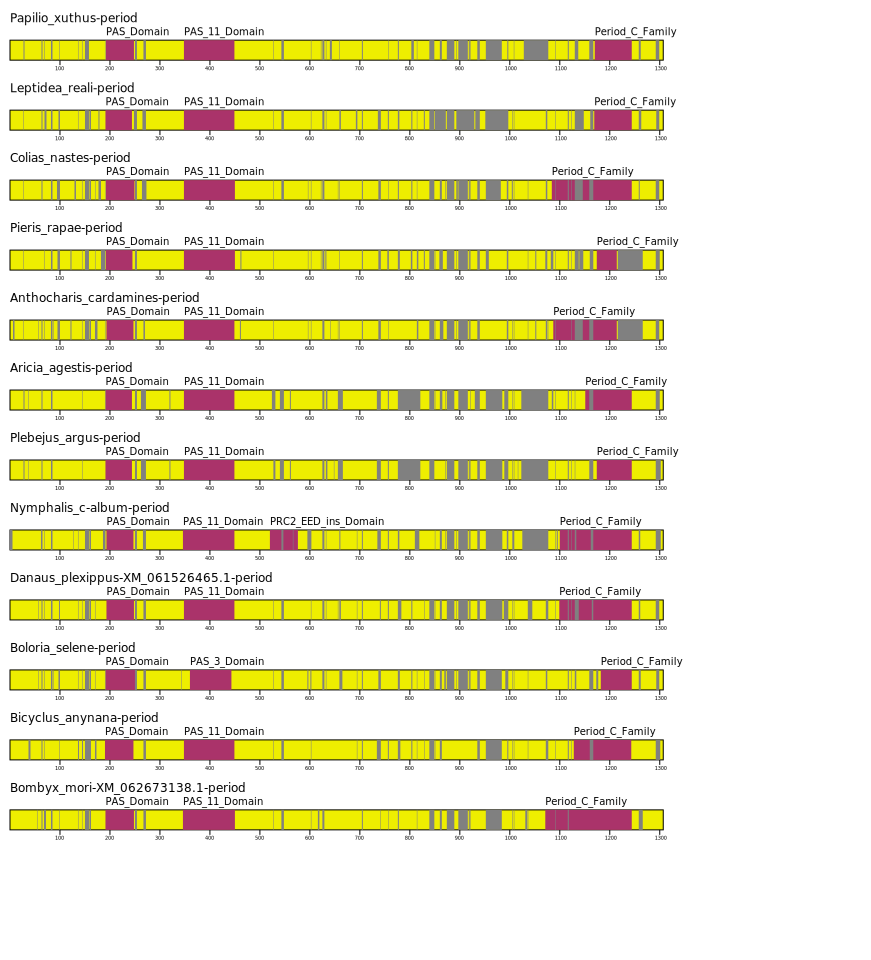

In [29]:
import drawsvg as draw
from Bio import SeqIO
import math

fasta_file = SeqIO.parse("/mnt/g/My Drive/tool/for_domain_search.fa", 'fasta')
for record in fasta_file:
    total_length = len(record.seq)
    break
print(total_length)
# total_length = 1947

from Bio import Phylo
tree = Phylo.read("/mnt/g/My Drive/tool/period_sequences_aligned_figtree.nwk", 'newick')
species_list = [term.name for term in tree.get_terminals()]
# print(species_list)

# dm = "Drosophila_melanogaster-AAA28752-period,1-180,211-212,242-250,283-322,522-524,526-529,533-534,553-559,560-568,754-759,795-797,802-803,832-833,842-850,895-899,907-909,915-916,921-939,959-962,1083-1084,1086-1087,1105-1112,1114-1129,1141-1142,1147-1148,1153-1156,1176-1234,1242-1250,1255-1258,1264-1265,1307-1309,1317-1319,1343-1349,1356-1358,1360-1361,1386-1395,1428-1439,1462-1475,1530-1584,1604-1643".split(",")
with open("/mnt/g/My Drive/tool/gap_position.txt", 'r') as gap_file:
    gap_list = gap_file.readlines()
with open("/mnt/g/My Drive/tool/domains.csv", 'r') as domain_file:
    domain_list = domain_file.readlines()
# with open("/mnt/g/My Drive/Circadian Rhythm review/01.Period/06.Sequences from paper accession/04.Cry2/exon_position.txt", 'r') as exons_file:
#     exons_list = exons_file.readlines()
    
d = draw.Drawing(total_length/1.5, 80*len(gap_list))    

for species_number in range(len(species_list)):
    species_name = species_list[species_number]
    # print(species_name)
    for gap_line in range(len(gap_list)):
        
        dm = gap_list[gap_line].strip().split(",")
        
        if dm[0] == species_name:
            print(dm[0])
            d.append(draw.Lines(10, 20*(species_number+1) + 50*(species_number) + 20,
                                 10+(total_length/10)*5, 20*(species_number+1)+ 50*(species_number) + 20,
                                10+(total_length/10)*5,20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                10,20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                close=True,
                        fill='#eeee00',
                        stroke='black'))
            d.append(draw.Text(dm[0], 12, 10, 20*(species_number+1)-18+ 50*(species_number) + 20))
            
            print(math.floor(total_length/100))
            temp_length = math.floor(total_length/100) * 100
            for i in range(math.floor(total_length/100)):
                d.append(draw.Lines(10+(temp_length/26)*(i+1),20*(species_number+1)+ 50*(species_number) + 40,
                                    10+(temp_length/26)*(i+1),20*(species_number+1)+ 50*(species_number) + 45,
                         stroke = "black"))
                d.append(draw.Text(f"{100*(i+1)}", 5, 5+(temp_length/26)*(i+1), 20*(species_number+1)+ 50*(species_number) + 50))
            
            for domain_line in domain_list:
                if dm[0] in domain_line:
                    domain_line_split = domain_line.split(",")
                    if domain_line_split[7] == "Domain":
                        start, stop = int(domain_line_split[1]), int(domain_line_split[2])
                        
                        d.append(draw.Lines(10+((start-1)*.5), 20*(species_number+1)+ 50*(species_number) + 20,
                                   10 + ((stop-1)*.5), 20*(species_number+1)+ 50*(species_number) + 20,
                                   10 + ((stop-1)*.5), 20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                   10+((start-1)*.5), 20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                   close = True,
                                   fill = "#AA336A"))
                        d.append(draw.Text(f"{domain_line_split[6]}_{domain_line_split[7]}", 10, 10+((start-1)*.5), -5 + 20*(species_number+1)+ 50*(species_number) + 20))
                    elif domain_line_split[7] == "Family" and float(domain_line_split[-3]) < 0.01:
                        start, stop = int(domain_line_split[1]), int(domain_line_split[2])
                        
                        d.append(draw.Lines(10+((start-1)*.5), 20*(species_number+1)+ 50*(species_number) + 20,
                                   10 + ((stop-1)*.5), 20*(species_number+1)+ 50*(species_number) + 20,
                                   10 + ((stop-1)*.5), 20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                   10+((start-1)*.5), 20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                   close = True,
                                   fill = "#AA336A"))
                        d.append(draw.Text(f"{domain_line_split[6]}_{domain_line_split[7]}", 10, 10+((start-1)*.5), -5 + 20*(species_number+1)+ 50*(species_number) + 20))
                        # print(domain_line)
            
            for i in range(1,len(dm)):
                # print(dm[i])
                start,stop = int(dm[i].split("-")[0]),int(dm[i].split("-")[1])
                d.append(draw.Lines(10+((start-1)*.5), 20*(species_number+1)+ 50*(species_number) + 20,
                                   10 + ((stop-1)*.5), 20*(species_number+1)+ 50*(species_number) + 20,
                                   10 + ((stop-1)*.5), 20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                   10+((start-1)*.5), 20 + 20*(species_number+1)+ 50*(species_number) + 20,
                                   close = True,
                                   fill = "#808080"))
           
            # for exon_line in exons_list:
            #     if dm[0] in exon_line:
            #         exon_line_split = exon_line.strip().split(",")
            #         # print(exon_line_split)
            #         exon_counter = 1
            #         for i in range (1, len(exon_line_split)):
            #             start,stop = int(exon_line_split[i].split("-")[0])+1,int(exon_line_split[i].split("-")[1])-1
            #             d.append(draw.Lines(10+((start-1)*.5), 23+ 20*(species_number+1)+ 50*(species_number) + 20,
            #                                 10+((start-1)*.5), 26 + 20*(species_number+1)+ 50*(species_number) + 20,
            #                                 10 + ((stop-1)*.5), 26 + 20*(species_number+1)+ 50*(species_number) + 20,
            #                                 10 + ((stop-1)*.5), 23 + 20*(species_number+1)+ 50*(species_number) + 20,
                                   
                                   
            #                        close = True,
            #                        fill = "#00008B"))
            #             # print(10+((start + ((stop-start)/2) -1)*.5), 35 + 20*(species_number+1)+ 30*(species_number))
            #             d.append(draw.Text(str(exon_counter), 10, 10+((start + ((stop-start)/2) -5)*.5), 35 + 20*(species_number+1)+ 50*(species_number) + 20))
            #             exon_counter += 1
            #             # assert False
                        

            
            
                # print(dm[i])
                # break

d.save_svg("/mnt/g/My Drive/tool/domains.svg" )
d